In [ ]:
import pandas as pd
import requests
import io

# Dataset url
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch data
response = requests.get(URL)
data = io.StringIO(response.text)

# Read CSV file into DataFrame
df = pd.read_csv(data)

# Display basic dataset information
print("\nDataset Info:\n")
df.info()

# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City      

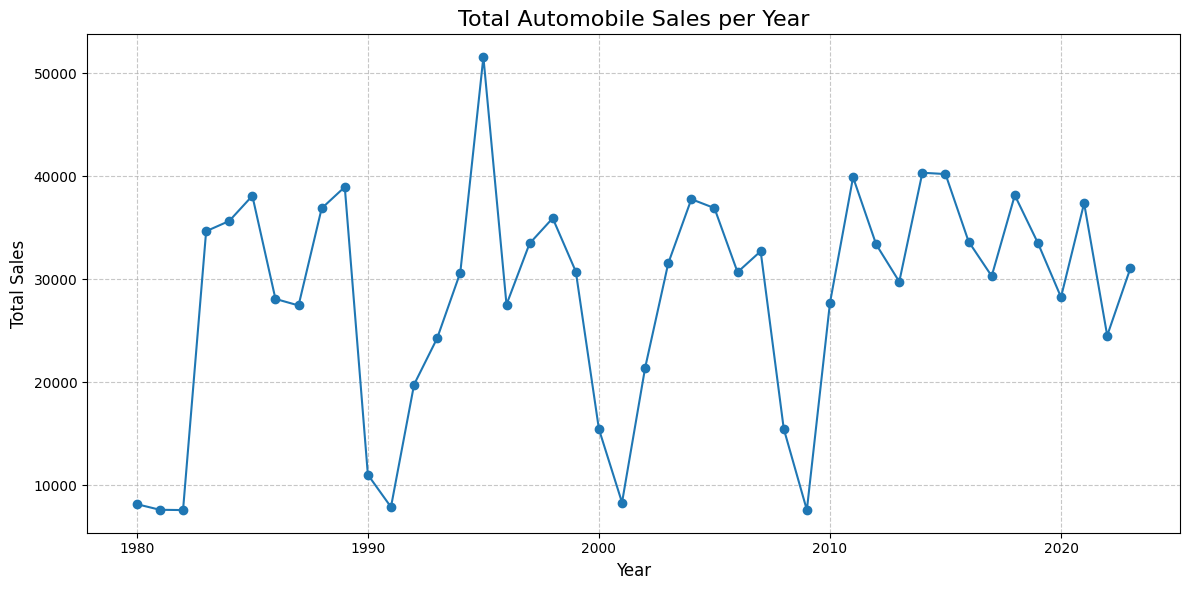

In [ ]:
# Task 1.1 - Develop a Line plot using the functionality of pandas to show how automobile sales fluctuate from year to year

import matplotlib.pyplot as plt

# Group by year and sum the sales
yearly_sales = df.groupby(df['Date'].dt.year)['Automobile_Sales'].sum().reset_index()

# Create line plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['Date'], yearly_sales['Automobile_Sales'], marker='o')

plt.title('Total Automobile Sales per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show() # Display plot

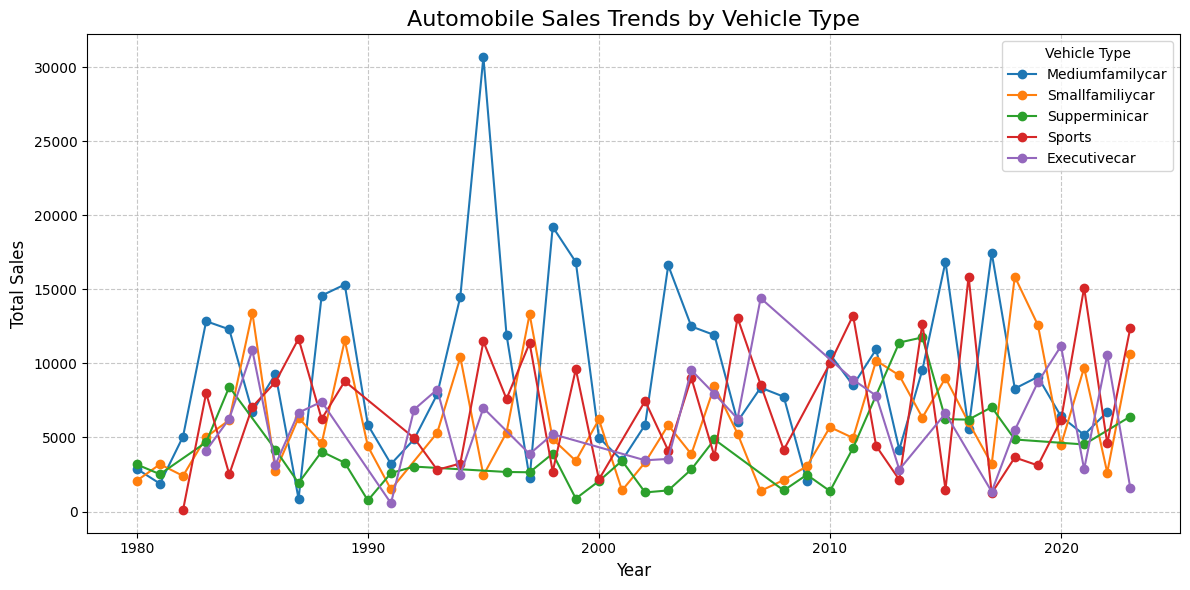

In [ ]:
# Task 1.2 - Plot different lines for categories of vehicle type and analyze the trend during recession periods

# Group by year, vehicle type, and sum the sales
yearly_type_sales = df.groupby([df['Date'].dt.year, 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

# Create line plot
plt.figure(figsize=(12, 6))

for vehicle_type in yearly_type_sales['Vehicle_Type'].unique():
    data = yearly_type_sales[yearly_type_sales['Vehicle_Type'] == vehicle_type]
    plt.plot(data['Date'], data['Automobile_Sales'], marker='o', label=vehicle_type)

plt.title('Automobile Sales Trends by Vehicle Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Vehicle Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show() # Display plot

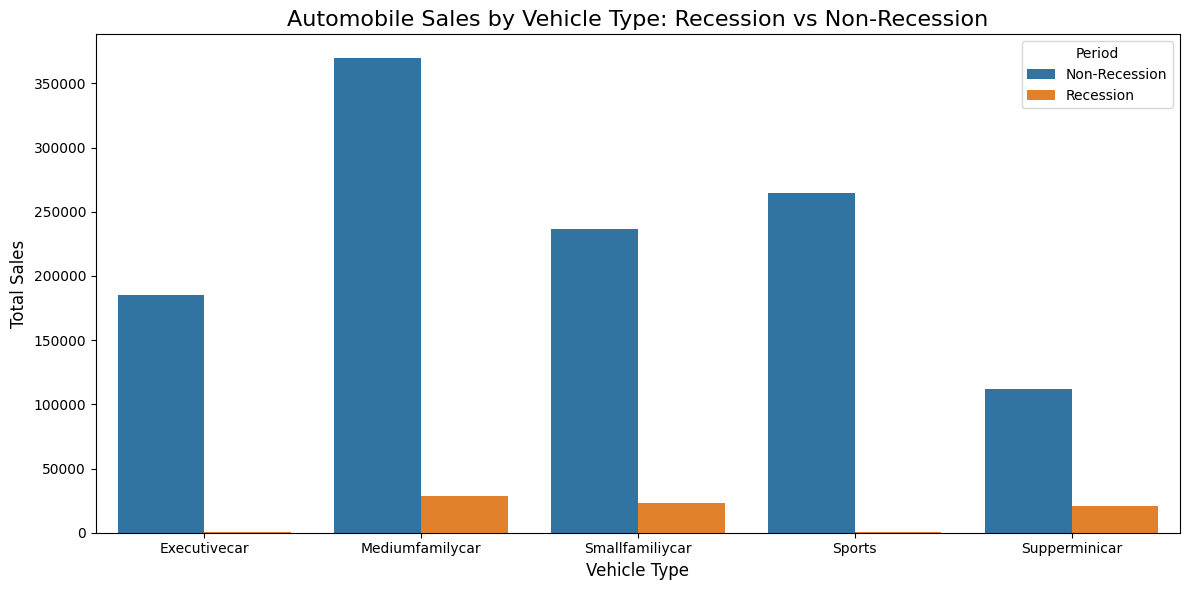

In [ ]:
# Task 1.3 - Use Seaborn to compare sales trend per vehicle type for recession vs non-recession periods

import seaborn as sns

# Create recession indicator
df['Period'] = df['Recession'].map({0: 'Non-Recession', 1: 'Recession'})

# Group by vehicle type, period and sum the sales
grouped_data = df.groupby(['Vehicle_Type', 'Period'])['Automobile_Sales'].sum().reset_index()

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Vehicle_Type', y='Automobile_Sales', hue='Period')

plt.title('Automobile Sales by Vehicle Type: Recession vs Non-Recession', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Period')
plt.tight_layout()

plt.show() # Display plot

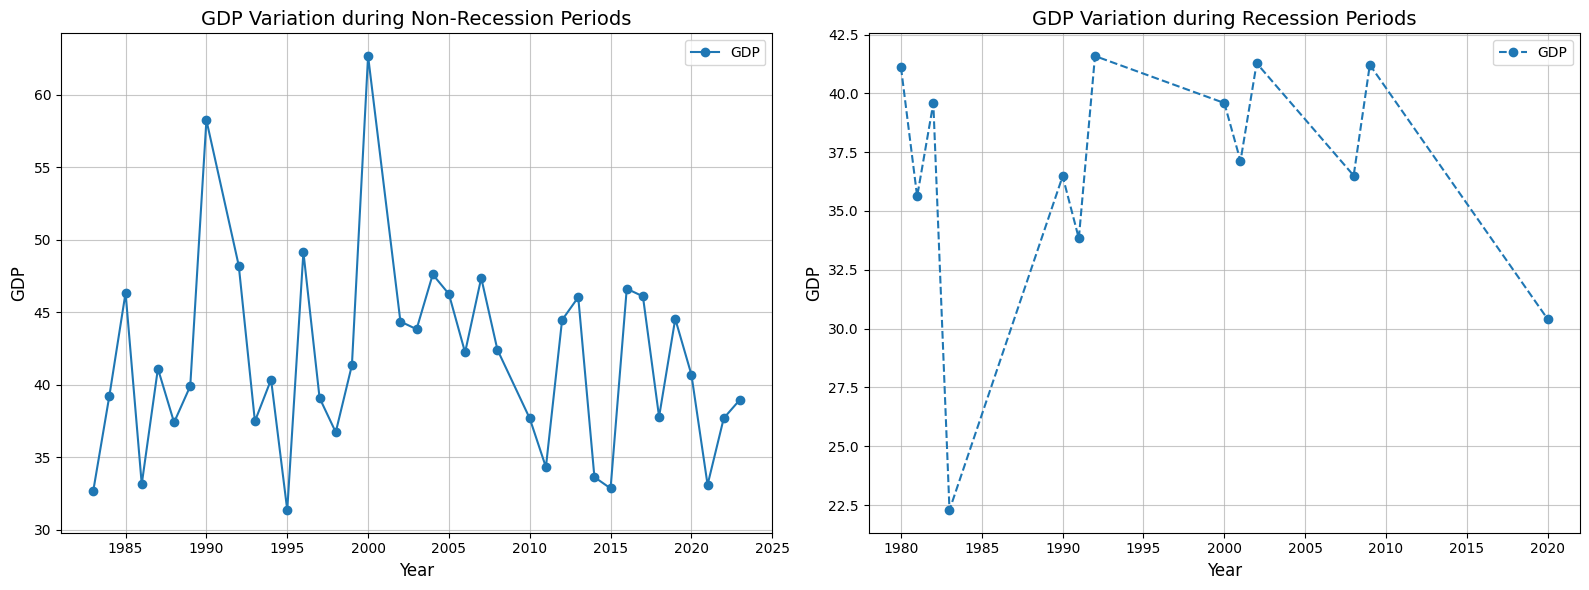

In [ ]:
# Task 1.4 - Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period

# Group by recession status and year, calculate mean GDP
df_temp = df.groupby(["Recession", "Year"])["GDP"].mean().reset_index()
no_recession = df_temp[df_temp["Recession"] == 0]
recession = df_temp[df_temp["Recession"] == 1]

# Create subplots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for non-recession periods
no_recession.plot(x="Year", y="GDP", kind="line", marker='o', ax=ax0)
ax0.set_title('GDP Variation during Non-Recession Periods', fontsize=14)
ax0.set_xlabel('Year', fontsize=12)
ax0.set_ylabel('GDP', fontsize=12)
ax0.grid(True, alpha=0.7)

# Plot for recession periods
recession.plot(x="Year", y="GDP", kind="line", marker='o', ax=ax1, linestyle='--')
ax1.set_title('GDP Variation during Recession Periods', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('GDP', fontsize=12)
ax1.grid(True, alpha=0.7)

plt.tight_layout()
plt.show()  # Display plot

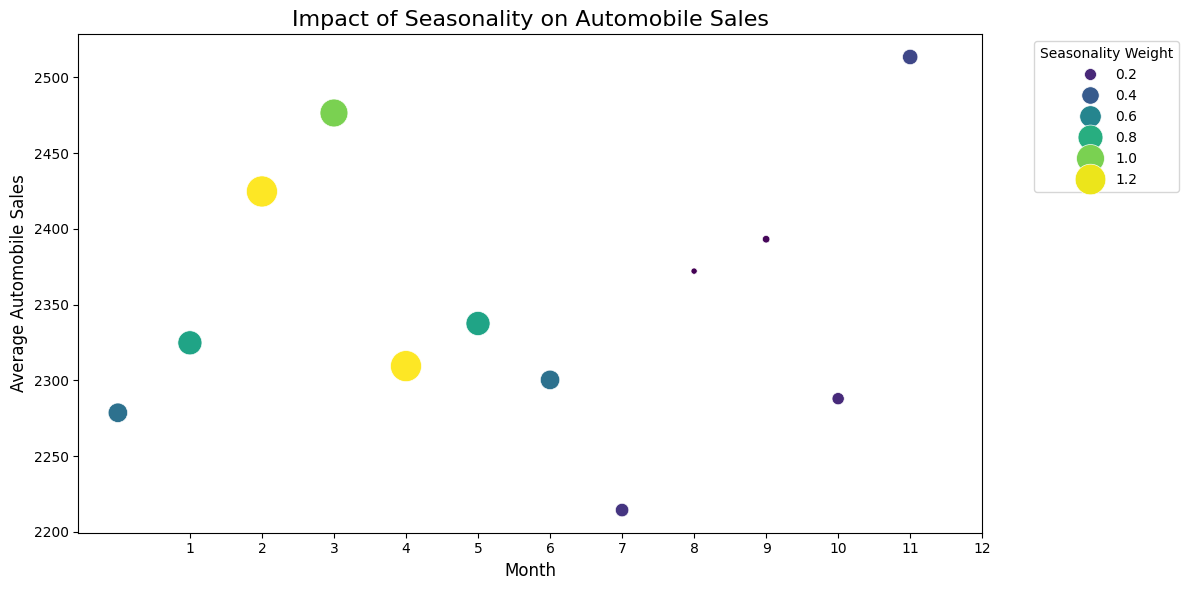

In [ ]:
# Task 1.5 - Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales

# Create dataframe copy and preprocess Month column
df_temp = df.copy()
months=df_temp["Month"].unique().tolist()
df_temp["Month"] = df_temp["Month"].replace(dict(zip(months, range(0,len(months)))))

# Group by month and calculate mean sales and seasonality weight
monthly_data = df_temp.groupby("Month")[["Automobile_Sales", "Seasonality_Weight"]].mean().reset_index()

# Create bubble plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=monthly_data,
                x='Month',
                y='Automobile_Sales',
                hue="Seasonality_Weight",
                size="Seasonality_Weight",
                sizes=(20, 500),  # Adjust bubble size range
                palette="viridis")  # Choose a color palette

plt.xticks(range(1, 13))
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Automobile Sales", fontsize=12)
plt.title("Impact of Seasonality on Automobile Sales", fontsize=16)
plt.legend(title="Seasonality Weight", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()  # Display plot

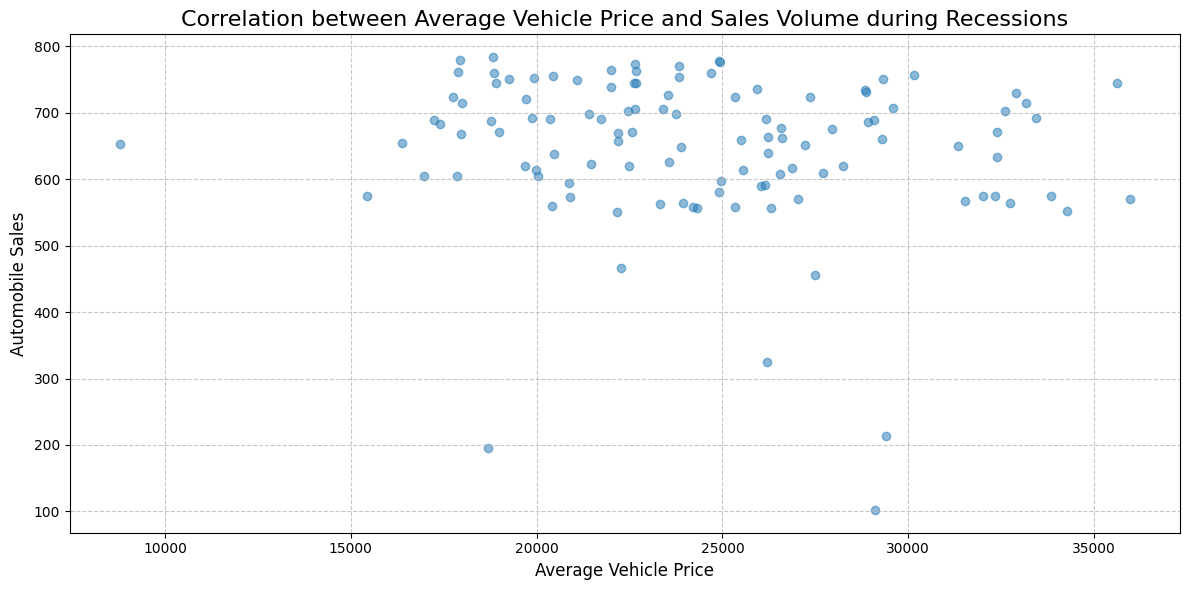

In [ ]:
# Task 1.6 - Use Matplotlib to develop a scatter plot to identify the correlation between average vehicle price and sales volume during recessions

# Filter data for recession periods
recession_data = df[df['Recession'] == 1]

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(recession_data['Price'],
            recession_data['Automobile_Sales'],
            alpha=0.5)

plt.title('Correlation between Average Vehicle Price and Sales Volume during Recessions', fontsize=16)
plt.xlabel('Average Vehicle Price', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()  # Display plot

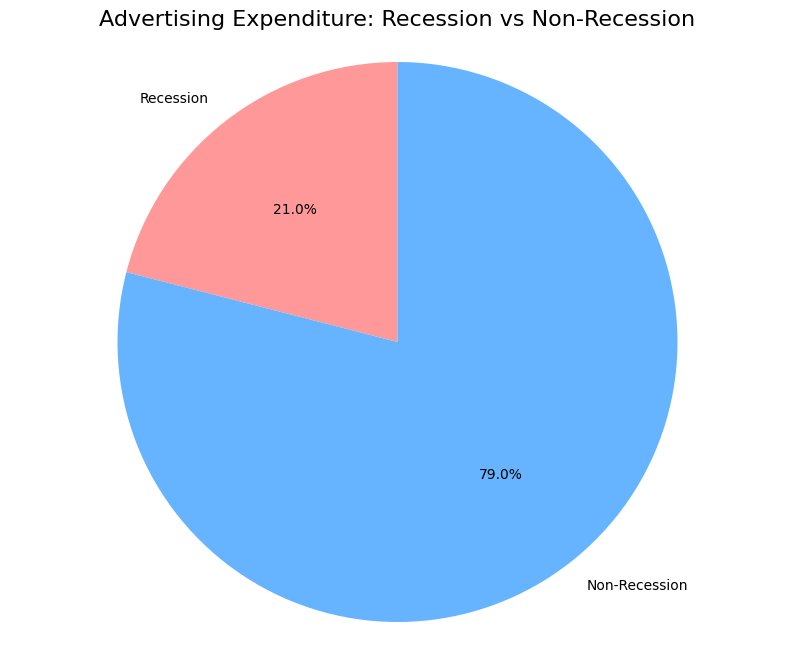

In [ ]:
# Task 1.7 - Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods

# Calculate total advertising expenditure for recession and non-recession periods
recession_exp = df[df['Recession'] == 1]['Advertising_Expenditure'].sum()
non_recession_exp = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()

# Create data for pie chart
sizes = [recession_exp, non_recession_exp]
labels = ['Recession', 'Non-Recession']
colors = ['#ff9999', '#66b3ff']

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio to ensure that pie is drawn as circle

plt.title('Advertising Expenditure: Recession vs Non-Recession', fontsize=16)

plt.show()  # Display plot

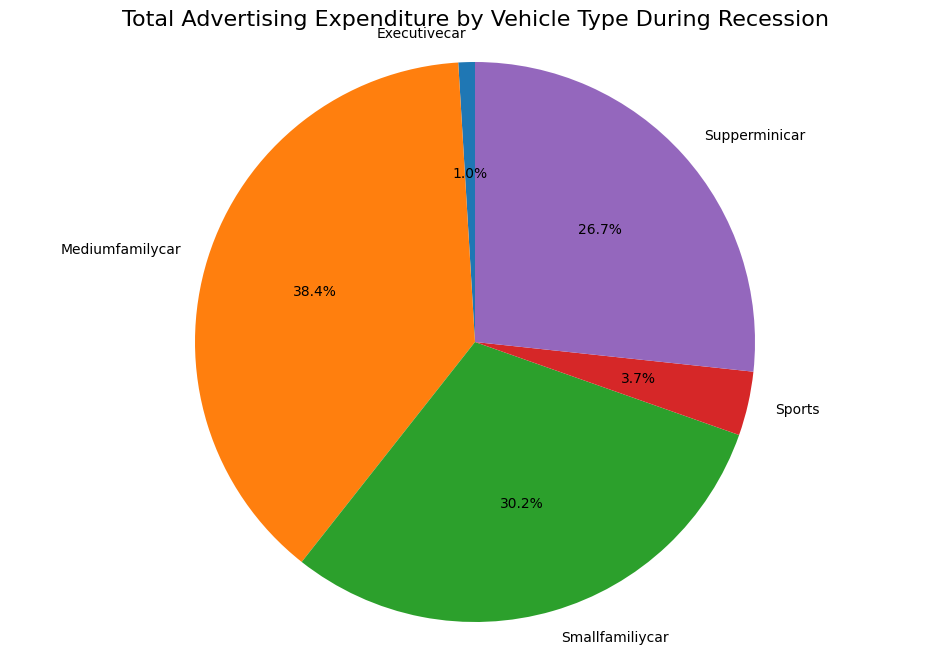

In [ ]:
# Task 1.8 - Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period

# Filter data for recession periods
recession_data = df[df['Recession'] == 1]

# Group by vehicle type and sum the advertising expenditure
vehicle_adv_exp = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create pie chart
plt.figure(figsize=(12, 8))
plt.pie(vehicle_adv_exp.values, labels=vehicle_adv_exp.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Total Advertising Expenditure by Vehicle Type During Recession', fontsize=16)

plt.show()  # Display plot

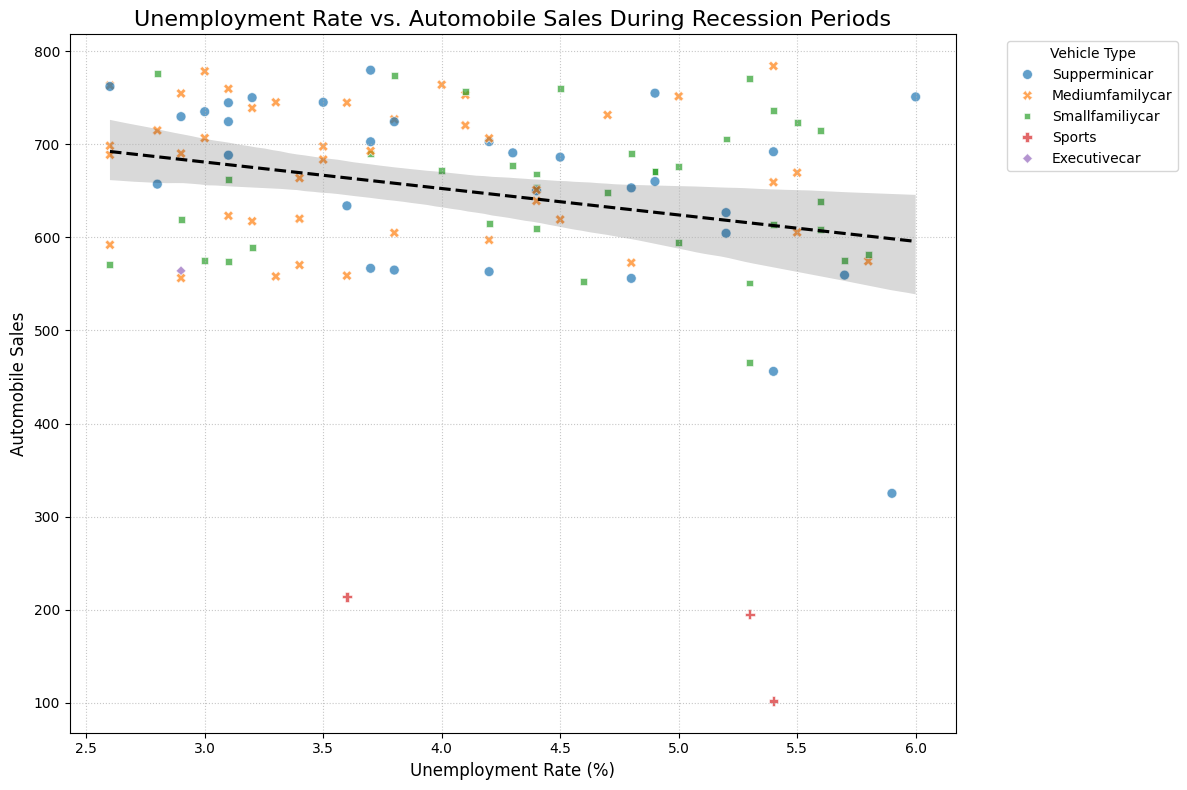

In [ ]:
# Task 1.9 - Develop a line plot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period

# Filter data for recession periods
recession_data = df[df['Recession'] == 1]

# Create plot
plt.figure(figsize=(12, 8))

# Create scatter plot with regression lines for each vehicle type
sns.scatterplot(data=recession_data, x='unemployment_rate', y='Automobile_Sales',
                hue='Vehicle_Type', style='Vehicle_Type', s=50, alpha=0.7)

sns.regplot(data=recession_data, x='unemployment_rate', y='Automobile_Sales',
            scatter=False, color='black', line_kws={'linestyle': '--'})

plt.title('Unemployment Rate vs. Automobile Sales During Recession Periods', fontsize=16)
plt.xlabel('Unemployment Rate (%)', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)

plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()  # Display plot